<a href="https://colab.research.google.com/github/abhishekgg14/Project_1/blob/main/fakenews_detection_using_SVM%2CRandomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [36]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

**Loading datasets**

In [2]:
# Load datasets
true = pd.read_csv("/content/True.csv", engine='python', error_bad_lines=False)
fake = pd.read_csv("/content/Fake.csv", engine='python', error_bad_lines=False)

<ipython-input-2-285531fb2dc8>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  true = pd.read_csv("/content/True.csv", engine='python', error_bad_lines=False)
<ipython-input-2-285531fb2dc8>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  fake = pd.read_csv("/content/Fake.csv", engine='python', error_bad_lines=False)


**Labeling**

In [4]:
fake['target'] = 'fake'
true['target'] = 'true'
#adding new column target and labeling fake for fake dataset and true for true dataset

In [5]:
print(fake)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...    

In [6]:
print(true)

                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv... 

**Merging**

In [8]:
news = pd.concat([fake, true]).reset_index(drop=True)
#merging both the true and fake datasets

In [ ]:
news.dropna()

In [9]:
print(news)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
44893  'Fully committed' NATO backs new U.S. approach...   
44894  LexisNexis withdrew two products from Chinese ...   
44895  Minsk cultural hub becomes haven from authorities   
44896  Vatican upbeat on possibility of Pope Francis ...   
44897  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       New

**Spliting train and test data**

In [10]:
x_train, x_test, y_train, y_test = train_test_split(news['text'], news.target, test_size=0.2, random_state=1)

**Pipeline for SVM model**

In [11]:
pipe_svm = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', LinearSVC())
])


**Training SVM**

In [13]:
model_svm = pipe_svm.fit(x_train.astype('U'), y_train.astype('U'))

**Evaluate SVM**

In [14]:
svm_pred = model_svm.predict(x_test.astype('U'))
print("Accuracy of SVM Classifier: {}%".format(round(accuracy_score(y_test, svm_pred)*100, 2)))
print("\nConfusion Matrix of SVM Classifier:\n")
print(confusion_matrix(y_test, svm_pred))
print("\nClassification Report of SVM Classifier:\n")
print(classification_report(y_test, svm_pred))


Accuracy of SVM Classifier: 99.39%

Confusion Matrix of SVM Classifier:

[[4644   38]
 [  17 4281]]

Classification Report of SVM Classifier:

              precision    recall  f1-score   support

        fake       1.00      0.99      0.99      4682
        true       0.99      1.00      0.99      4298

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



*Accuracy*

In [28]:
SVM=model_svm.score(x_test, y_test)


In [29]:
print(SVM)

0.9938752783964365


-------------------------

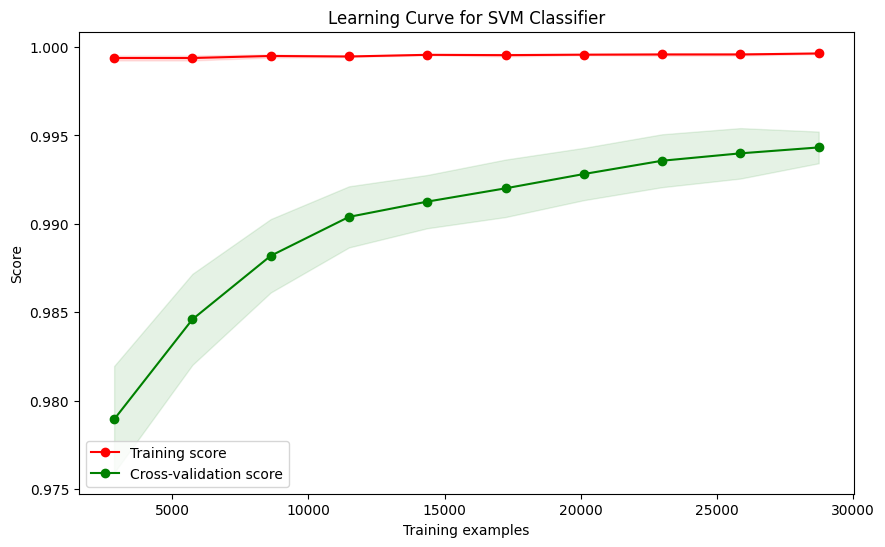

In [37]:

train_sizes, train_scores, test_scores = learning_curve(pipe_svm, x_train.astype('U'), y_train.astype('U'), cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve for SVM Classifier")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.legend(loc="best")
plt.show()


**Pipeline  for Randomforest model**

In [16]:

pipe_rf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', RandomForestClassifier())
])

**Training Randomforest**

In [18]:
model_rf = pipe_rf.fit(x_train.astype('U'), y_train.astype('U'))

**Evaluate Randomforest**

In [38]:
rf_pred = model_rf.predict(x_test.astype('U'))
print("Accuracy of RandomForest Classifier: {}%".format(round(accuracy_score(y_test, rf_pred)*100, 2)))
print("\nConfusion Matrix of RandomForest Classifier:\n")
print(confusion_matrix(y_test, rf_pred))
print("\nClassification Report of RandomForest Classifier:\n")
print(classification_report(y_test, rf_pred))

Accuracy of RandomForest Classifier: 98.81%

Confusion Matrix of RandomForest Classifier:

[[4627   55]
 [  52 4246]]

Classification Report of RandomForest Classifier:

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4682
        true       0.99      0.99      0.99      4298

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



*Accuracy*

In [26]:
RF=model_rf.score(x_test, y_test)

In [27]:
print(RF)

0.9880846325167038


**Bar chart**

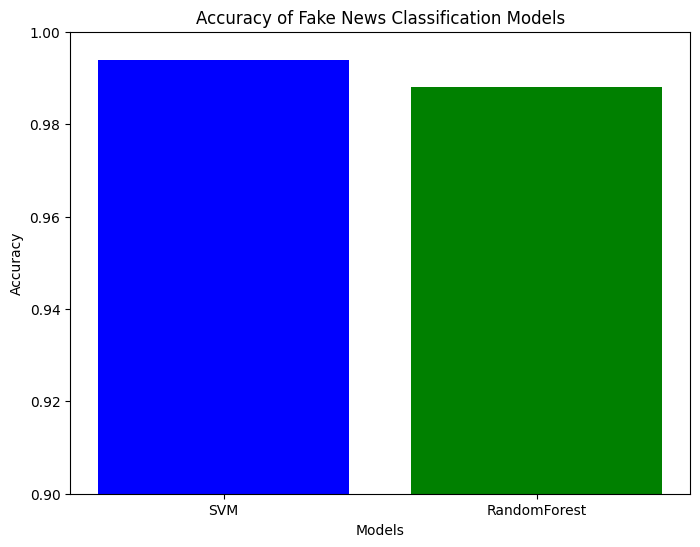

In [32]:

models = ['SVM', 'RandomForest']
accuracies = [SVM, RF]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Accuracy of Fake News Classification Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1)

# Display the chart
plt.show()

**Function to classify user input**

In [21]:
def classify_input(input_text, model):
    input_text = pd.Series([input_text])
    prediction = model.predict(input_text)
    return prediction[0]


**Reading user input for testing**

In [39]:
user_input = input("Enter a news article: ")
user_prediction_svm = classify_input(user_input, model_svm)
user_prediction_rf = classify_input(user_input, model_rf)

print(f"The input news article is classified as SVM: {user_prediction_svm}")
print(f"The input news article is classified as RandomForest: {user_prediction_rf}")

Enter a news article: Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lac